In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import re
%matplotlib inline


In [3]:
#Reading the data
df_google = pd.read_csv("C:/Users/hessa.shamnad/Desktop/Data Science Project/job_skills.csv")
df_google.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
df_google.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


### What is the most Demaded Programming Language?

In [5]:
language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','kotlin']
min_qualification = df_google['Minimum Qualifications'].tolist()
min_qualification_str = "".join(str(v) for v in min_qualification).lower()

program_count = dict((x,0) for x in language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;']", min_qualification_str):
    if w in program_count:
        program_count[w] += 1
        
print(program_count)

{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'kotlin': 3}


In [6]:
language_demand = sorted(program_count.items(), key = lambda x: x[1], reverse=True)
print(language_demand)

[('python', 97), ('javascript', 77), ('java', 76), ('sql', 73), ('c++', 54), ('c', 18), ('c#', 15), ('ruby', 14), ('php', 7), ('perl', 6), ('objective-c', 3), ('kotlin', 3)]


In [7]:
language_df = pd.DataFrame(language_demand, columns = ['Programming Languages', 'Demand'])
language_df['Demand'] = language_df.Demand.astype('int')
language_df = language_df.iloc[::-1]
language_top = language_df.tail(5)
print(language_top)

  Programming Languages  Demand
4                   c++      54
3                   sql      73
2                  java      76
1            javascript      77
0                python      97


<function matplotlib.pyplot.show(*args, **kw)>

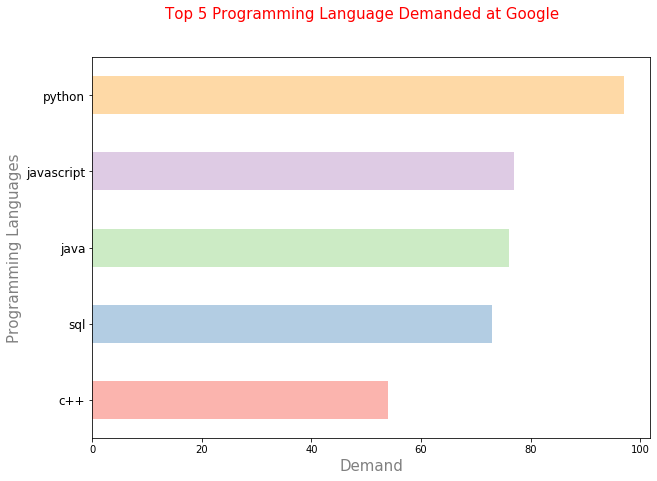

In [8]:
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
language_top.plot(kind = 'barh',x = 'Programming Languages', y = 'Demand', legend = False, figsize= (10,7), color= colors)
plt.suptitle('Top 5 Programming Language Demanded at Google', fontsize = 15, color = 'red')
plt.ylabel('Programming Languages', size = 15, color = 'grey', alpha = 1)
plt.xlabel("Demand", size = 15, color = 'grey', alpha = 1)
plt.yticks(fontsize = 12, color = 'Black')
plt.show

### How many years of work experience do you need at google?

In [9]:
work_exp = defaultdict(lambda: 0)
for x in re.findall(r'[0-9]+ years', min_qualification_str):
    work_exp[x] += 1
print(work_exp)

defaultdict(<function <lambda> at 0x000002166DB700D8>, {'3 years': 114, '7 years': 41, '2 years': 60, '4 years': 92, '10 years': 76, '5 years': 181, '12 years': 18, '8 years': 65, '6 years': 60, '9 years': 8, '15 years': 4, '13 years': 1, '11 years': 1, '14 years': 1})


In [10]:
work_exp = sorted(work_exp.items(), key=lambda x: x[1], reverse=True)
work_exp_df = pd.DataFrame(work_exp, columns = ['Years', 'Demand'])
work_exp_df = work_exp_df[::-1]
work_exp_df.tail(5)

,Years,Demand
4,8 years,65
3,10 years,76
2,4 years,92
1,3 years,114
0,5 years,181


<function matplotlib.pyplot.show(*args, **kw)>

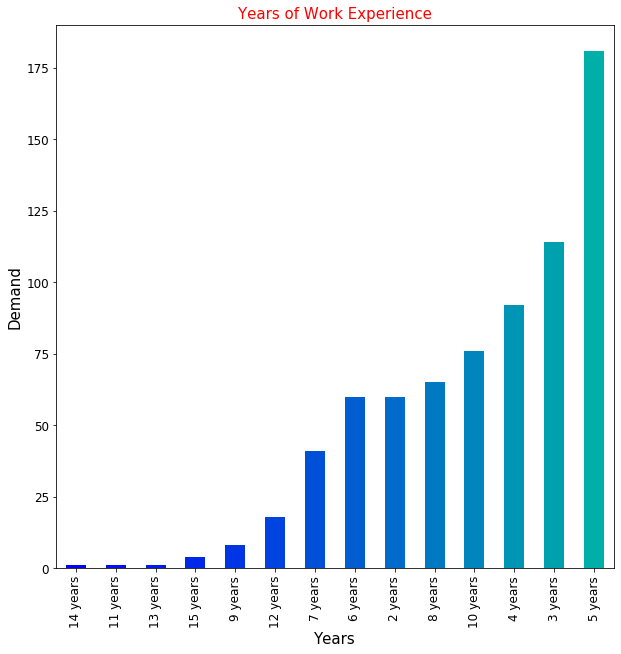

In [11]:
colors = plt.cm.winter(np.linspace(0, 1, 20))
work_exp_df.plot(kind = 'bar', x = 'Years', y = 'Demand', figsize = (10,10), legend = False, stacked = True, color = colors)
plt.title('Years of Work Experience', fontsize = 15, color = 'red')
plt.xlabel("Years",size = 15, color = 'Black', alpha = 1)
plt.ylabel('Demand', size = 15, color = 'Black', alpha = 1)
plt.yticks(fontsize = 12, color = 'Black')
plt.xticks(fontsize = 12, color = 'Black')
plt.show

In [12]:
degree_list = ["bachelor", "bachelor's", "ba", "bs", "master", "master's", "ma", "mba", "phd"]
degree_count = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w'+#-]+|[.!?;']", min_qualification_str):
    if w in degree_count:
        degree_count[w] += 1
        
print(degree_count)

{'bachelor': 15, "bachelor's": 147, 'ba': 800, 'bs': 877, 'master': 32, "master's": 49, 'ma': 1, 'mba': 73, 'phd': 8}


In [21]:
degree_demand = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)
degree_df = pd.DataFrame(degree_demand, columns = ['Degree', 'Demand'])
degree_df = degree_df[::-1]
degree_df.tail(5)

,Degree,Demand
4,master's,49
3,mba,73
2,bachelor's,147
1,ba,800
0,bs,877


<function matplotlib.pyplot.show(*args, **kw)>

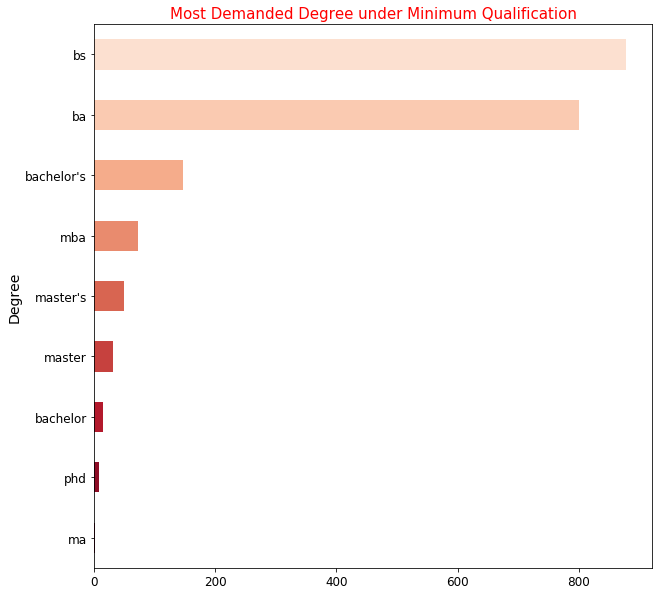

In [25]:
colors = plt.cm.RdBu(np.linspace(0, 1, 20))
degree_df.plot(kind = 'barh', x = 'Degree', y = 'Demand', figsize = (10,10), legend = False, stacked = True, color = colors)
plt.title('Most Demanded Degree under Minimum Qualification', fontsize = 15, color = 'red')
plt.ylabel("Degree",color = 'Black', size = 14)
plt.yticks(fontsize = 12, color = 'Black')
plt.xticks(fontsize = 12, color = 'Black')
plt.show